## Візуалізація accessibility елементів

Також додаємо приклади як можна візуалізувати елементи з дерева доступності.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir = '/content/drive/MyDrive/Hackaton/app_data'

In [3]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv(f'/content/drive/MyDrive/Hackaton/train_test_split.csv')

In [8]:
train = data[data['split'] == 'train']

In [9]:
test = data[data['split'] == 'test']

In [10]:
train

,screen_path,split
0,24hourwallpaper/1707228345/,train
1,24hourwallpaper/1707228419/,train
2,24hourwallpaper/1707228389/,train
3,Almighty/1707228267/,train
4,Almighty/1707228277/,train
...,...,...
277,Weather/1707084038/,train
278,Weather/1707083741/,train
279,Zotero/1707127355/,train
280,Zotero/1707127414/,train


In [17]:
import os
exceptions = []
for idx, row in train.iterrows():
    path = os.path.join(dir, row["corrected_path"].strip("/"))
    try:
        elements = os.listdir(path)
    except Exception as e:
        exceptions.append(path)
        continue

    for element in elements:
        if element.endswith('png'):
            train.loc[idx, 'img_path'] = os.path.join(path, element)
        elif element.endswith('json'):
            train.loc[idx, 'json_path'] = os.path.join(path, element)

<ipython-input-17-3ada2b33027f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[idx, 'img_path'] = os.path.join(path, element)
<ipython-input-17-3ada2b33027f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[idx, 'json_path'] = os.path.join(path, element)


In [18]:
exceptions

[]

In [15]:
name_corrections = {
    'Elelphas': 'Elephas',
    'Marginnote': 'MarginNote',
    'Merlin Project Express': 'Merlin Project',
    'Mockuuups studio': 'Mockuuups Studio'
}

def correct_app_names(path, corrections):
    for incorrect, correct in corrections.items():
        if incorrect in path:
            path = path.replace(incorrect, correct)
    return path

train['corrected_path'] = train['screen_path'].apply(lambda x: correct_app_names(x, name_corrections))


<ipython-input-15-e5beef078198>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['corrected_path'] = train['screen_path'].apply(lambda x: correct_app_names(x, name_corrections))


In [19]:
train

,screen_path,split,img_path,json_path,corrected_path
0,24hourwallpaper/1707228345/,train,/content/drive/MyDrive/Hackaton/app_data/24hou...,NaN,24hourwallpaper/1707228345/
1,24hourwallpaper/1707228419/,train,/content/drive/MyDrive/Hackaton/app_data/24hou...,NaN,24hourwallpaper/1707228419/
2,24hourwallpaper/1707228389/,train,/content/drive/MyDrive/Hackaton/app_data/24hou...,NaN,24hourwallpaper/1707228389/
3,Almighty/1707228267/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228267/
4,Almighty/1707228277/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228277/
...,...,...,...,...,...
277,Weather/1707084038/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707084038/
278,Weather/1707083741/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707083741/
279,Zotero/1707127355/,train,/content/drive/MyDrive/Hackaton/app_data/Zoter...,NaN,Zotero/1707127355/
280,Zotero/1707127414/,train,/content/drive/MyDrive/Hackaton/app_data/Zoter...,NaN,Zotero/1707127414/


In [20]:
train_with_annotation = train.dropna()

In [21]:
train_with_annotation

,screen_path,split,img_path,json_path,corrected_path
3,Almighty/1707228267/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228267/
4,Almighty/1707228277/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228277/
5,Almighty/1707228194/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228194/
6,Almighty/1707228289/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228289/
7,Almighty/1707228256/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228256/
...,...,...,...,...,...
275,VSCode/1707227004/,train,/content/drive/MyDrive/Hackaton/app_data/VSCod...,/content/drive/MyDrive/Hackaton/app_data/VSCod...,VSCode/1707227004/
276,VSCode/1707226920/,train,/content/drive/MyDrive/Hackaton/app_data/VSCod...,/content/drive/MyDrive/Hackaton/app_data/VSCod...,VSCode/1707226920/
277,Weather/1707084038/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707084038/
278,Weather/1707083741/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707083741/


In [22]:
train_with_annotation.to_csv('train_with_annotation.csv')

In [23]:
train_with_empty = train[train.isna().any(axis=1)]

In [24]:
train_with_empty

,screen_path,split,img_path,json_path,corrected_path
0,24hourwallpaper/1707228345/,train,/content/drive/MyDrive/Hackaton/app_data/24hou...,NaN,24hourwallpaper/1707228345/
1,24hourwallpaper/1707228419/,train,/content/drive/MyDrive/Hackaton/app_data/24hou...,NaN,24hourwallpaper/1707228419/
2,24hourwallpaper/1707228389/,train,/content/drive/MyDrive/Hackaton/app_data/24hou...,NaN,24hourwallpaper/1707228389/
35,Bike/1707240207/,train,/content/drive/MyDrive/Hackaton/app_data/Bike/...,NaN,Bike/1707240207/
36,Bike/1707240233/,train,/content/drive/MyDrive/Hackaton/app_data/Bike/...,NaN,Bike/1707240233/
...,...,...,...,...,...
266,Typing-Mind/1707209926/,train,/content/drive/MyDrive/Hackaton/app_data/Typin...,NaN,Typing-Mind/1707209926/
267,Typing-Mind/1707209895/,train,/content/drive/MyDrive/Hackaton/app_data/Typin...,NaN,Typing-Mind/1707209895/
268,Ulysses/1707171227/,train,/content/drive/MyDrive/Hackaton/app_data/Ulyss...,NaN,Ulysses/1707171227/
279,Zotero/1707127355/,train,/content/drive/MyDrive/Hackaton/app_data/Zoter...,NaN,Zotero/1707127355/


In [ ]:
train_with_annotation.iloc[0]['json_path']

In [ ]:
train_with_empty.to_csv('train_without_annotations.csv')

In [25]:
SCREEN_PATH = "/content/drive/MyDrive/Hackaton/app_data/Almighty/1707228267/Almighty-1707228268.83.png"
TREE_PATH = "/content/drive/MyDrive/Hackaton/app_data/Almighty/1707228267/com.onmyway133.Almighty-setapp.json"

In [26]:
from PIL import Image, ImageDraw, ImageFont

def draw_elements(node, image_draw):
    """
    Draw elements from a JSON representation of a GUI onto an image.

    :param node: JSON of GUI
    :param image_draw: ImageDraw object to draw on the PIL image of GUI
    """
    if node['visible_bbox'] is not None:
        x, y, w, h = node['visible_bbox']
        image_draw.rectangle([(x, y), (x + w, y + h)], outline="red", width=2)

        # Draw the name of the object if it exists
        if 'name' in node and node['role']:
            font = ImageFont.load_default()
            image_draw.text((x, y + h + 5), node['role'], fill="blue", font=font)

    # Recursively parse all children
    if 'children' in node and node['children']:
        for child in node['children']:
            draw_elements(child, image_draw)


{'name': 'Almighty', 'role': 'AXWindow', 'description': 'None', 'role_description': 'standard window', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXGroup', 'description': 'None', 'role_description': 'group', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXSplitGroup', 'description': 'None', 'role_description': 'split group', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXGroup', 'description': 'None', 'role_description': 'group', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXScrollArea', 'description': 'None', 'role_description': 'scroll area', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXOutline', 'description': 'Sidebar', 'role_description': 'outline', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXRow', 'description': 'None', 'role_description': 'outline row', 'value': 'None', 'children': [{'name': 'None', 'role': 'AXCell', 'description': 'None', 'role_description': 'cell', 'value': 'None', 'children': [{'name': '

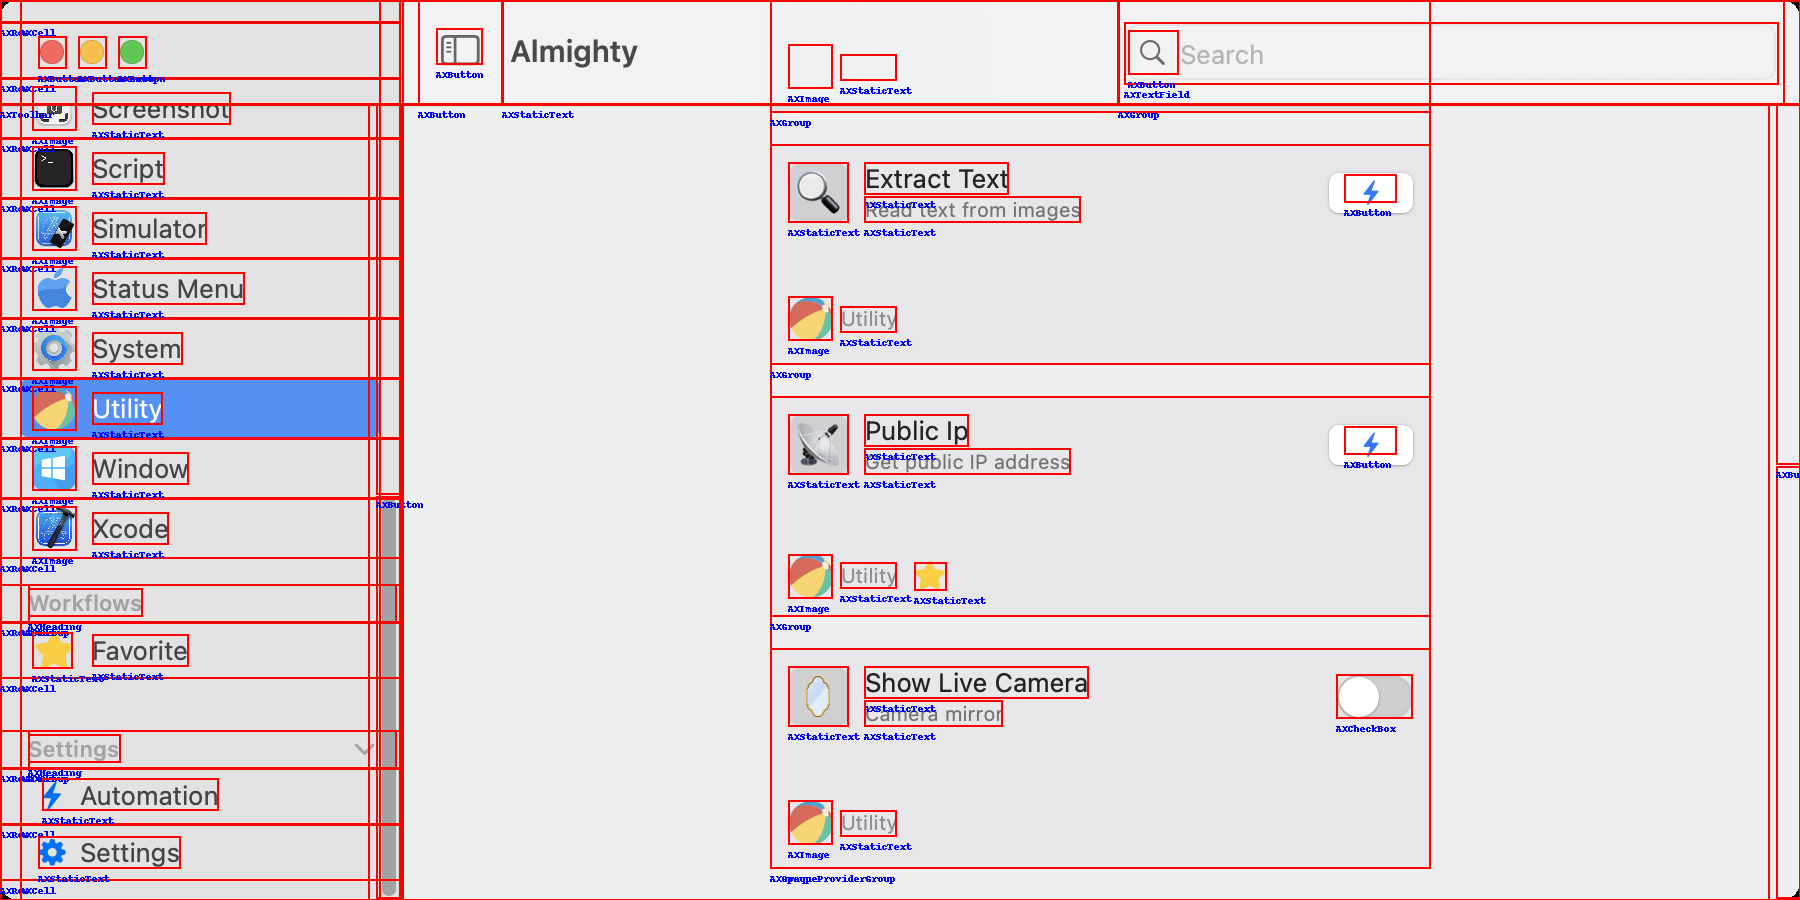

In [28]:
import json
with open(TREE_PATH, 'r') as json_file:
    gui_tree = json.load(json_file)
    print(gui_tree)

# Load image
image = Image.open(SCREEN_PATH).convert("RGB")
img_draw = ImageDraw.Draw(image)

# Draw all elements
img_draw = draw_elements(gui_tree, img_draw)

image

In [29]:
def extract_info(node, info_list=[]):
    """
    Recursively extract names, bounding boxes, and descriptions from a JSON node.

    :param node: JSON of GUI
    :param info_list: List to store information about each node
    :return: List of dictionaries with 'name', 'bbox', and 'description' for each node
    """
    if node.get('visible_bbox') is not None:
        name = node.get('role', 'No name')
        bbox = node['visible_bbox']
        description = node.get('description', 'No description')

        info_list.append({
            'name': name,
            'bbox': bbox,
            'description': description
        })
    for child in node.get('children', []):
        extract_info(child, info_list)

    return info_list
info_list = extract_info(gui_tree)

In [30]:
annotations = []

for idx, row in train_with_annotation.iterrows():
    json_path = os.path.join(dir, row["json_path"])
    with open(json_path, 'r') as json_file:
        gui_tree = json.load(json_file)
        annotation = extract_info(gui_tree)
        annotations.append(annotation)

train_with_annotation['annotation'] = annotations

<ipython-input-30-18c39b4c193e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_with_annotation['annotation'] = annotations


In [31]:
train_with_annotation

,screen_path,split,img_path,json_path,corrected_path,annotation
3,Almighty/1707228267/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228267/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
4,Almighty/1707228277/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228277/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
5,Almighty/1707228194/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228194/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
6,Almighty/1707228289/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228289/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
7,Almighty/1707228256/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228256/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
...,...,...,...,...,...,...
275,VSCode/1707227004/,train,/content/drive/MyDrive/Hackaton/app_data/VSCod...,/content/drive/MyDrive/Hackaton/app_data/VSCod...,VSCode/1707227004/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
276,VSCode/1707226920/,train,/content/drive/MyDrive/Hackaton/app_data/VSCod...,/content/drive/MyDrive/Hackaton/app_data/VSCod...,VSCode/1707226920/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
277,Weather/1707084038/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707084038/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
278,Weather/1707083741/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707083741/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."


In [32]:
def convert_bbox(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[2])/2.0 - 1
    y = (box[1] + box[3])/2.0 - 1
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [66]:
values = []
classes = {}

In [ ]:
train_with_annotation2 = train_with_annotation[[]]

In [65]:
def get_class_id_by_name(class_name):
    for class_id, name in classes.items():
        if name == class_name:
            return class_id
    return None
counter = 0
for index, row in train_with_annotation.iterrows():
    img_name = os.path.basename(row['img_path'])
    txt_name = img_name.replace('.png', '.txt')
    label_path = os.path.join('data/labels', txt_name)
    with open(label_path, 'w') as file:
        for annotation in row['annotation']:
          class_id = annotation['name']
          if class_id in values:
              id = get_class_id_by_name(class_id)
              print(id)
          else:
            values.append(class_id)
            id = counter
            classes[counter] = class_id
            counter += 1
          bbox = annotation['bbox']
          if not bbox:
            print(f"Error converting bbox for image: {img_name}")
          line = f"{id} {' '.join(map(str, bbox))}\n"
          print(f"Writing to {txt_name}: {line.strip()}")
          file.write(line)
          file.write(line)

Streaming output truncated to the last 5000 lines.
13
Writing to BetterTouchTool-1707235073.41.txt: 13 630 404 226 34
91
Writing to BetterTouchTool-1707235073.41.txt: 91 864 402 36 36
13
Writing to BetterTouchTool-1707235073.41.txt: 13 956 404 172 34
91
Writing to BetterTouchTool-1707235073.41.txt: 91 1136 402 36 36
13
Writing to BetterTouchTool-1707235073.41.txt: 13 322 454 764 32
13
Writing to BetterTouchTool-1707235073.41.txt: 13 322 526 338 34
91
Writing to BetterTouchTool-1707235073.41.txt: 91 668 524 36 36
13
Writing to BetterTouchTool-1707235073.41.txt: 13 322 576 1006 32
12
Writing to BetterTouchTool-1707235073.41.txt: 12 326 674 48 48
1879
Writing to BetterTouchTool-1707235073.41.txt: 1879 374 680 270 34
12
Writing to BetterTouchTool-1707235073.41.txt: 12 674 688 24 24
13
Writing to BetterTouchTool-1707235073.41.txt: 13 770 682 526 38
12
Writing to BetterTouchTool-1707235073.41.txt: 12 326 738 48 48
13
Writing to BetterTouchTool-1707235073.41.txt: 13 386 744 188 34
12
Writing 

KeyboardInterrupt: 

In [38]:
train_with_annotation

,screen_path,split,img_path,json_path,corrected_path,annotation
3,Almighty/1707228267/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228267/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
4,Almighty/1707228277/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228277/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
5,Almighty/1707228194/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228194/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
6,Almighty/1707228289/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228289/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
7,Almighty/1707228256/,train,/content/drive/MyDrive/Hackaton/app_data/Almig...,/content/drive/MyDrive/Hackaton/app_data/Almig...,Almighty/1707228256/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
...,...,...,...,...,...,...
275,VSCode/1707227004/,train,/content/drive/MyDrive/Hackaton/app_data/VSCod...,/content/drive/MyDrive/Hackaton/app_data/VSCod...,VSCode/1707227004/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
276,VSCode/1707226920/,train,/content/drive/MyDrive/Hackaton/app_data/VSCod...,/content/drive/MyDrive/Hackaton/app_data/VSCod...,VSCode/1707226920/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
277,Weather/1707084038/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707084038/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."
278,Weather/1707083741/,train,/content/drive/MyDrive/Hackaton/app_data/Weath...,/content/drive/MyDrive/Hackaton/app_data/Weath...,Weather/1707083741/,"[{'name': 'AXWindow', 'bbox': [0, 0, 1800, 900..."


In [52]:
import shutil
import os

labels_dir_path = '/content/data/labels'

if os.path.exists(labels_dir_path) and os.path.isdir(labels_dir_path):
    shutil.rmtree(labels_dir_path)
    os.makedirs(labels_dir_path, exist_ok=True)
